In [18]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### How many males and females participated in the test

In [6]:
data.loc[data['gender'] == 'male', 'gender'].value_counts()

male    482
Name: gender, dtype: int64

In [7]:
data.loc[data['gender'] == 'female', 'gender'].value_counts()

female    518
Name: gender, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### students parental level of education

<AxesSubplot:xlabel='gender,parental level of education'>

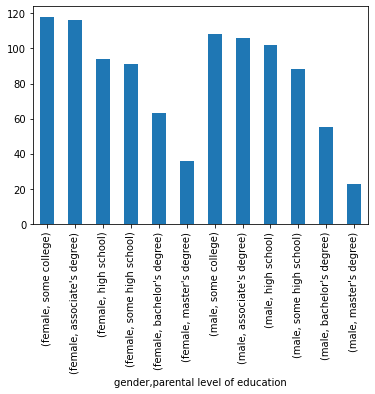

In [20]:
data.groupby('gender').agg('parental level of education').value_counts().plot(kind='bar', x='parental level of education', y='Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(some college,)'),
  Text(1, 0, "(associate's degree,)"),
  Text(2, 0, '(high school,)'),
  Text(3, 0, '(some high school,)'),
  Text(4, 0, "(bachelor's degree,)"),
  Text(5, 0, "(master's degree,)")])

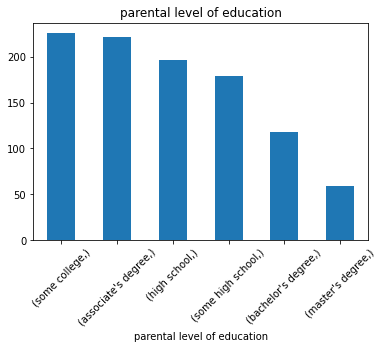

In [89]:
data[['parental level of education']].value_counts().plot(kind='bar')
plt.title('parental level of education')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

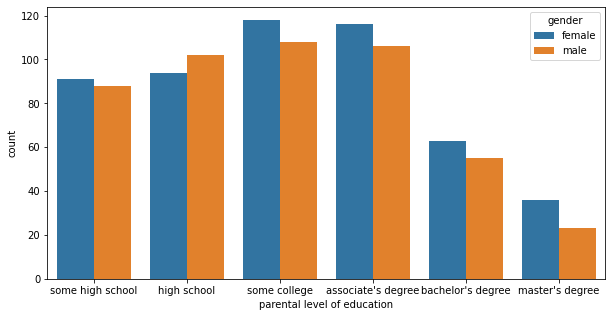

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x="parental level of education", data=data,hue='gender')

In [68]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Who scores the most on average for math, reading and writing based on
1)Gender

In [44]:
df=data[['gender','math score','reading score','writing score']].groupby('gender').mean()

In [45]:
df

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


2)Test preparation course

In [47]:
df1=data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean()

In [48]:
df1

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### What do you think about the scoring variation for math, reading and writing

● Gender

In [83]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [85]:
df2=data[['gender','math score','reading score','writing score']].groupby('gender').std()
df2

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


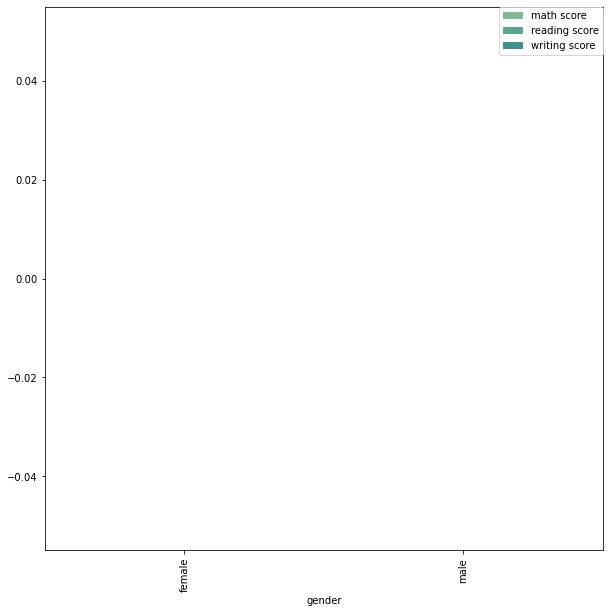

In [100]:
sns.set_palette("crest")
df2.groupby('gender').agg('std').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.);